In [4]:
import json
import pandas as pd
import os
from pprint import pprint
import re
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Preprosamiento previo. De un gran dataset escogemos 5 subreddits para hacer el analisis grupal e individual
## League of legends

In [49]:
import json
## Data real pero tenemos que procesarla. Tarda por tamaños de archivos

file_name = 'sample_data.json'
main_df = pd.read_json(file_name,lines = True)
data_directory = "./data";
df = pd.DataFrame()
for filename in os.listdir(data_directory):         
    lines = [line.rstrip('\n') for line in open(data_directory + r"/" + filename)]    
    jsons_array = []
    i = 0
    for line in lines:        
        line = line.replace("null", "\"\"")                
        json_string = line
        try:                                  
            jsons_array.append(json.loads(json_string))                  
        except:   
            continue
            
    df = pd.DataFrame.from_dict(jsons_array, orient='columns')    
    file_name = filename
    break


df.head()

,author,author_cakeday,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,...,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type
0,vortex30,NaN,,,People loooooove quoting Warren Buffett here. ...,True,0,1519776000,,1519776490,...,False,t3_80pua7,t1_duxkd5c,/r/weedstocks/comments/80pua7/maricann_faces_o...,1520324632,3,False,weedstocks,t5_2zfqj,public
1,SomeCruzDude,NaN,california-jaguars,California Jaguars,"My comment was a joke, if Spurs can't hold on ...",True,0,1519776000,,False,...,True,t3_80qqw3,t1_duxmjmj,/r/MLS/comments/80qqw3/two_earthquakes_players...,1520324632,2,False,MLS,t5_2rbnb,public
2,Surprentis,NaN,,,Has anyone played this multiplayer with friend...,True,0,1519776000,,False,...,False,t3_80lmzz,t3_80lmzz,/r/dawnofwar/comments/80lmzz/psa_to_anyone_who...,1520324632,1,False,dawnofwar,t5_2s7bq,public
3,3piecepete,NaN,,,"Don’t be a turkey, knock it off with the puns",True,0,1519776000,,False,...,False,t3_80q0cj,t1_duxmddy,/r/funny/comments/80q0cj/slowest_strike_in_the...,1520324632,85,False,funny,t5_2qh33,public
4,transcribot,NaN,,Bot Transcriber in Training,It looks like there's text in this image. I've...,True,0,1519776000,,False,...,False,t3_80rgrd,t3_80rgrd,/r/TranscribersOfReddit/comments/80rgrd/nicegi...,1520324632,1,False,TranscribersOfReddit,t5_3jqmx,public


In [50]:
t = df.groupby('subreddit').size().sort_values(ascending=False)
t

subreddit
AskReddit               155974
politics                 74121
news                     50299
nba                      35823
The_Donald               30699
Overwatch                26371
hockey                   24687
funny                    23412
worldnews                23066
gaming                   22386
soccer                   20965
movies                   20694
leagueoflegends          20553
SquaredCircle            19401
nfl                      18866
todayilearned            18639
FortNiteBR               18585
pics                     17951
videos                   16330
pathofexile              15930
CryptoCurrency           14431
gifs                     12245
relationships            12201
teenagers                11916
FireEmblemHeroes         11520
Rainbow6                 10955
MonsterHunter            10823
RocketLeagueExchange     10451
aww                      10255
Showerthoughts           10148
                         ...  
LadyGagasAss                 

## Analizamos la data. Limpiamos y preprocesamos

In [4]:
#df.shape

In [5]:
#df.groupby('subreddit').size()

In [6]:
## Leemos la data de prueba (Para trabajar el modelo inicial)

#file_name = 'sample_data.json'

#entry_df = pd.read_json(file_name,lines = True)
#print(entry_df.shape)
#entry_df.head()

(10000, 21)


,author,author_cakeday,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,...,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id
0,Dethcola,NaN,,Clairemont,A quarry,True,0,1506816000,None,0,...,dnqik14,False,t3_73ieyz,t3_73ieyz,/r/sandiego/comments/73ieyz/best_place_for_gra...,1509189606,3,False,sandiego,t5_2qq2q
1,PennyBotV2,NaN,flair2-penny1,The Bot,[Salutations! I'm not sure what you said.](htt...,True,0,1506816000,None,0,...,dnqik15,False,t3_73g740,t1_dnqiiv7,/r/RWBY/comments/73g740/ruby_gives_greetings_a...,1509189606,3,False,RWBY,t5_2vhg0
2,Sir_Firebum,NaN,HOU-wagon,Astros Bandwagon,I got into baseball at about he same time Matt...,True,0,1506816000,None,0,...,dnqik16,False,t3_73hlwn,t1_dnqc3lu,/r/baseball/comments/73hlwn/matt_cain_in_his_f...,1509189606,2,False,baseball,t5_2qm7u
3,deanzynut,NaN,woodcutting,99 wcing btw,FUCKING TORY,True,0,1506816000,None,0,...,dnqik17,True,t3_73gw9b,t1_dnqdo99,/r/2007scape/comments/73gw9b/carls_platebody/d...,1509189606,18,False,2007scape,t5_2wbww
4,OfullOstomacheO,NaN,None,None,I see a water dragon,True,0,1506816000,None,0,...,dnqik18,False,t3_73i6z3,t3_73i6z3,/r/mildlyinteresting/comments/73i6z3/this_bric...,1509189606,1,False,mildlyinteresting,t5_2ti4h


In [7]:
# Subreddits with more data
#subredditTop = entry_df.groupby('subreddit').count().sort_values(by=['subreddit_id'], ascending=False).head(5)
#subredditTop


,author,author_cakeday,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit_id
subreddit,,,,,,,,,,,,,,,,,,,,
AskReddit,486,1,0,0,486,486,486,486,9,486,486,486,486,486,486,486,486,486,486,486
CFB,403,1,382,382,403,403,403,403,0,403,403,403,403,403,403,403,403,403,403,403
CrazyIdeas,261,0,0,0,261,261,261,261,0,261,261,261,261,261,261,261,261,261,261,261
news,158,0,0,0,158,158,158,158,0,158,158,158,158,158,158,158,158,158,158,158
ConciseIAmA,147,0,0,0,147,147,147,147,73,147,147,147,147,147,147,147,147,147,147,147


In [51]:
# List of most popular subreddits
#subredditList = subredditTop[subredditTop.columns[0]].keys().tolist()
subredditList = ['movies','gaming','leagueoflegends','NintendoSwitch','politics']

In [52]:
# Dictionary: Reddit_id -> Reddit_name
entry_df = df
subredditIdToCode = {}

for subReddit in subredditList:
    subredditIdToCode[subReddit] = entry_df.head(1000)[entry_df.head(1000).subreddit == subReddit].iloc[0]['subreddit_id']
    
subredditIdToCode

{'NintendoSwitch': 't5_3h47q',
 'gaming': 't5_2qh03',
 'leagueoflegends': 't5_2rfxx',
 'movies': 't5_2qh3s',
 'politics': 't5_2cneq'}

In [53]:
entry_df = entry_df[entry_df['subreddit'].isin(subredditList)] 
print(entry_df.shape)
entry_df.reset_index(drop=True,inplace=True)
entry_df.head()
# We get 14 % of data

(146093, 22)


,author,author_cakeday,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,...,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type
0,Demon_God_Burny,NaN,,,In what possible way is this a scandal? The al...,True,0,1519776000,,False,...,False,t3_80rezs,t1_duxmmo3,/r/politics/comments/80rezs/jeff_sessions_doj_...,1520324632,7,False,politics,t5_2cneq,public
1,Lunarrushh,NaN,diana,Hi,How come? maybe you just havent adjusted to hi...,True,0,1519776000,,False,...,False,t3_80p3sz,t1_duxmeec,/r/leagueoflegends/comments/80p3sz/sion_hit_18...,1520324632,2,False,leagueoflegends,t5_2rfxx,public
2,A-wild-comment,NaN,,,I can't wait to see it. Love any scifi movie.,True,0,1519776001,,False,...,False,t3_80mgaz,t1_duwmcfr,/r/movies/comments/80mgaz/box_office_week_blac...,1520324633,1,False,movies,t5_2qh3s,public
3,valley_pete,NaN,,,we both thought the movie would be famous enou...,True,0,1519776002,,False,...,False,t3_80mww9,t1_duxml12,/r/movies/comments/80mww9/a_feature_look_at_19...,1520324633,1,False,movies,t5_2qh3s,public
4,[deleted],NaN,,,[removed],True,0,1519776002,,False,...,False,t3_80pmse,t1_duxeukl,/r/politics/comments/80pmse/pence_abortion_wil...,1520324633,1,False,politics,t5_2cneq,public


In [54]:
## Podemos borrar algunas columnas no relevantes para el analisis
entry_df = entry_df.drop(['subreddit','author','controversiality','author_flair_css_class','author_flair_text','can_gild','created_utc','id','permalink','retrieved_on','stickied','parent_id','link_id'],axis = 1)
print(entry_df.shape)
entry_df.head()

(146093, 9)


,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,subreddit_type
0,NaN,In what possible way is this a scandal? The al...,,False,0,False,7,t5_2cneq,public
1,NaN,How come? maybe you just havent adjusted to hi...,,False,0,False,2,t5_2rfxx,public
2,NaN,I can't wait to see it. Love any scifi movie.,,False,0,False,1,t5_2qh3s,public
3,NaN,we both thought the movie would be famous enou...,,False,0,False,1,t5_2qh3s,public
4,NaN,[removed],,False,0,False,1,t5_2cneq,public


In [55]:
entry_df = entry_df.drop(['subreddit_type'],axis=1)
entry_df.head()

,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id
0,NaN,In what possible way is this a scandal? The al...,,False,0,False,7,t5_2cneq
1,NaN,How come? maybe you just havent adjusted to hi...,,False,0,False,2,t5_2rfxx
2,NaN,I can't wait to see it. Love any scifi movie.,,False,0,False,1,t5_2qh3s
3,NaN,we both thought the movie would be famous enou...,,False,0,False,1,t5_2qh3s
4,NaN,[removed],,False,0,False,1,t5_2cneq


In [56]:
## Borramos las filas que tengan como comentario borrado [Deleted]
df = entry_df.query('body != "[deleted]" and body != "[removed]"')
print(df.shape)
df.head()
# Obtenemos 10%

(137642, 8)


,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id
0,NaN,In what possible way is this a scandal? The al...,,False,0,False,7,t5_2cneq
1,NaN,How come? maybe you just havent adjusted to hi...,,False,0,False,2,t5_2rfxx
2,NaN,I can't wait to see it. Love any scifi movie.,,False,0,False,1,t5_2qh3s
3,NaN,we both thought the movie would be famous enou...,,False,0,False,1,t5_2qh3s
5,NaN,How are they milking it? They sang chants for ...,,False,0,False,3,t5_2rfxx


In [57]:
## Vamos a elimitar el formato de hipervinculo en un comentario []() y agregar una 

hyperLinks = {}
hyerLinksCount = {}
commentLength = {}
def processHyperLink(row):         
    comment = row['body']
    matches = re.findall(r"\[.*\]\(.*\)", comment)                          
    hyperLinks[row.name] = []
    hyerLinksCount[row.name] = len(matches) 
    if matches:                      
        for match in matches:                                    
            m = re.search(r"\[.*\]", match)            
            if(m):                
                comment = comment.replace(match,m.group(0))
            m = re.search(r"\(.*\)", match)            
            if(m):  
                hyperLinks[row.name].append(m.group(0))                   
    commentLength[row.name] = len(comment)
    return comment                                           


df['body'] = df.apply(processHyperLink,axis=1)
df['commentLength'] = pd.Series(commentLength)
df['hyperlinksCount'] = pd.Series(hyerLinksCount)
df.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,commentLength,hyperlinksCount
0,NaN,In what possible way is this a scandal? The al...,,False,0,False,7,t5_2cneq,144,0
1,NaN,How come? maybe you just havent adjusted to hi...,,False,0,False,2,t5_2rfxx,165,0
2,NaN,I can't wait to see it. Love any scifi movie.,,False,0,False,1,t5_2qh3s,46,0
3,NaN,we both thought the movie would be famous enou...,,False,0,False,1,t5_2qh3s,120,0
5,NaN,How are they milking it? They sang chants for ...,,False,0,False,3,t5_2rfxx,210,0


In [58]:
def isEdited(edit):
    if(edit):
        return 1
    return 0
        
df['edited'] = df['edited'].apply(isEdited)
print(df[df['edited'] == 0].shape)
print(df[df['edited'] != 0].shape)
df.head()

(134007, 10)
(3635, 10)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,commentLength,hyperlinksCount
0,NaN,In what possible way is this a scandal? The al...,,0,0,False,7,t5_2cneq,144,0
1,NaN,How come? maybe you just havent adjusted to hi...,,0,0,False,2,t5_2rfxx,165,0
2,NaN,I can't wait to see it. Love any scifi movie.,,0,0,False,1,t5_2qh3s,46,0
3,NaN,we both thought the movie would be famous enou...,,0,0,False,1,t5_2qh3s,120,0
5,NaN,How are they milking it? They sang chants for ...,,0,0,False,3,t5_2rfxx,210,0


In [59]:
# Variables numéricas
num_vars = ['score','commentLength','hyperlinksCount']
num_vars

['score', 'commentLength', 'hyperlinksCount']

In [60]:
# Variables categóricas
cat_vars = ['author_cakeday','distinguished','subreddit_id']
cat_vars

['author_cakeday', 'distinguished', 'subreddit_id']

In [61]:
cat_dict = {}

for cat in cat_vars:
    # 2. Transformamos la variable a tipo category
    df[cat] = df[cat].astype('category')
    
    # 3. Agregamos el diccionario de códigos
    cat_dict[cat] = {i+1:e for i,e in enumerate(df[cat].cat.categories)}

cat_dict

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


{'author_cakeday': {1: True},
 'distinguished': {1: '', 2: 'moderator'},
 'subreddit_id': {1: 't5_2cneq',
  2: 't5_2qh03',
  3: 't5_2qh3s',
  4: 't5_2rfxx',
  5: 't5_3h47q'}}

In [62]:
## No hay data faltante
df[num_vars].isna().sum()

score              0
commentLength      0
hyperlinksCount    0
dtype: int64

In [2]:
## Todo: Ahora que tenemos los urls copiados pondemos hacer un banco de los dominios mas anexados y generar un feature
## de los dominions que anexa un comentario
#file_name = '2018_2.json'

In [63]:
# Guardamos con pickle la data
with open('data/pickle/' + file_name + '_cat_dict.pkl', 'wb') as f:
    pickle.dump(cat_dict, f)    

df.to_pickle('data/pickle/' +file_name + '_train.pkl')

In [87]:
data_directory = "./data/pickle/";
df_list = []
years = ['2018_2','2018_3']
for year in years:     
    with open(data_directory + year + '.json_cat_dict.pkl', 'rb') as f:
        cat_dict = pickle.load(f)
        df = pd.read_pickle(data_directory + year + '.json_train.pkl')
        print(df.shape)
        df_list.append(df)

df_raw = pd.concat(df_list)
print(df_raw.shape)
df_raw.head()

(121185, 10)
(137642, 10)
(258827, 10)


,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,commentLength,hyperlinksCount
0,NaN,So it’s cool when he supported an accused pedo...,,False,0,False,8,t5_2cneq,101,0
1,NaN,"The problem is, we can get this to the front o...",,False,0,False,1,t5_2qh03,175,0
2,NaN,EA best game designer. Is nice.,,False,0,False,2,t5_2qh03,31,0
3,NaN,&gt;a bit\n\n,,False,0,False,4,t5_2qh03,11,0
4,NaN,"\nAs a reminder, this subreddit [is for civil ...",moderator,False,0,False,1,t5_2cneq,465,2


In [88]:
df = df_raw.copy()
df.columns

Index(['author_cakeday', 'body', 'distinguished', 'edited', 'gilded',
       'is_submitter', 'score', 'subreddit_id', 'commentLength',
       'hyperlinksCount'],
      dtype='object')

In [89]:
# Copia

# Conversion de categorica a numerica
for n,col in df.items():    
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1
        
df.head()

,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,commentLength,hyperlinksCount
0,0,So it’s cool when he supported an accused pedo...,1,False,0,False,8,1,101,0
1,0,"The problem is, we can get this to the front o...",1,False,0,False,1,2,175,0
2,0,EA best game designer. Is nice.,1,False,0,False,2,2,31,0
3,0,&gt;a bit\n\n,1,False,0,False,4,2,11,0
4,0,"\nAs a reminder, this subreddit [is for civil ...",2,False,0,False,1,1,465,2


In [90]:
df.is_submitter = df.is_submitter.astype(int)

print(df[df['is_submitter'] != 1].shape)
print(df[df['is_submitter'] == 1].shape)
df

(251340, 10)
(7487, 10)


,author_cakeday,body,distinguished,edited,gilded,is_submitter,score,subreddit_id,commentLength,hyperlinksCount
0,0,So it’s cool when he supported an accused pedo...,1,False,0,0,8,1,101,0
1,0,"The problem is, we can get this to the front o...",1,False,0,0,1,2,175,0
2,0,EA best game designer. Is nice.,1,False,0,0,2,2,31,0
3,0,&gt;a bit\n\n,1,False,0,0,4,2,11,0
4,0,"\nAs a reminder, this subreddit [is for civil ...",2,False,0,0,1,1,465,2
6,0,Hi /u/GREIGEMONEY. Thank you for participating...,2,False,0,0,1,4,607,2
7,0,I don't know how many times a YouTube video ha...,1,False,0,0,3,2,114,0
8,0,&gt; There's also an additional small problem ...,1,False,0,0,2,3,251,0
9,0,plat 3 ^^ but yeah it is obviously not a serio...,1,False,0,0,2,4,67,0
10,0,I think they see it but don’t care because he ...,1,False,0,0,4,1,182,0


In [91]:
# Temporal hasta que Bag of Words y Word2Vec se acabe. Dropeamos el body
df = df.drop(['body'],axis=1)

subreddit_id
1    117967
2     40496
3     39134
4     37426
5     23804
dtype: int64

## Visualizacion de la data

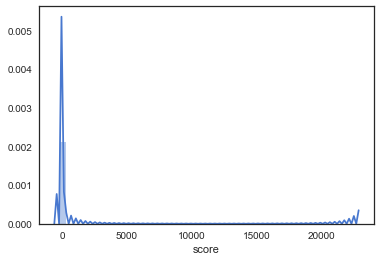

In [92]:
# Se vee una gran disproporcion, favoreciendo a puntajes bajos
sns.distplot(df['score']);

In [93]:
t = df.drop(['body'],axis=1)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(13,5))

for c,ax in zip(t, axes.flatten()):
    sns.distplot(t[c], ax=ax)
    
plt.tight_layout()

ValueError: labels ['body'] not contained in axis

## División de data de entrenamiento, validación y  prueba

In [94]:
df.shape

(258827, 9)

In [95]:
from sklearn.model_selection import train_test_split

x = df.drop('score', axis=1)
y = df['score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(207061, 8)
(51766, 8)
(207061,)
(51766,)


In [112]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.initializers import Constant
from keras.regularizers import l2
import math

lr = 0.09
bs = 256
nb = math.ceil(len(x_train)/bs) # Nro de batches
l2_w = 0.01
nb

809

In [113]:
# Primero intentaremos realizar la regresión debido a la naturaleza continua de la data (Numerica)
model = Sequential([
    Dense(64, activation='relu', kernel_initializer='he_normal', use_bias=False, kernel_regularizer=l2(l2_w),
          input_shape=(8,)),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_initializer='he_normal', use_bias=False, kernel_regularizer=l2(l2_w)),
    BatchNormalization(),    
    Dense(16, activation='relu', kernel_initializer='he_normal', use_bias=False, kernel_regularizer=l2(l2_w)),
    BatchNormalization(),    
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_w))
])

model.compile(Adam(lr), loss='logcosh', metrics=['accuracy'])
# La pérdida 'sparse_categorical_crossentropy' realiza automaticamente la conversión
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                512       
_________________________________________________________________
batch_normalization_20 (Batc (None, 64)                256       
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2048      
_________________________________________________________________
batch_normalization_21 (Batc (None, 32)                128       
_________________________________________________________________
dense_29 (Dense)             (None, 16)                512       
_________________________________________________________________
batch_normalization_22 (Batc (None, 16)                64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
__________

In [100]:
# Codigo de clase
def show_results(log):
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(log.history['val_loss'], label='validation')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['acc'], label='train')
    ax2.plot(log.history['val_acc'], label='validation')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
    for ax in axes: ax.legend()

In [114]:
log = model.fit(x_train, y_train, batch_size=bs, epochs=100,
                validation_data=[x_test, y_test])


Train on 207061 samples, validate on 51766 samples
Epoch 1/100
207061/207061 [==============================] - 4s 21us/step - loss: 12.2927 - acc: 0.3601 - val_loss: 12.6434 - val_acc: 0.3625
Epoch 2/100
207061/207061 [==============================] - 3s 13us/step - loss: 12.2647 - acc: 0.3606 - val_loss: 12.6428 - val_acc: 0.3625
Epoch 3/100
207061/207061 [==============================] - 3s 13us/step - loss: 12.2646 - acc: 0.3606 - val_loss: 12.6427 - val_acc: 0.3625
Epoch 4/100
207061/207061 [==============================] - 3s 14us/step - loss: 12.2645 - acc: 0.3606 - val_loss: 12.6427 - val_acc: 0.3625
Epoch 5/100
207061/207061 [==============================] - 3s 13us/step - loss: 12.2645 - acc: 0.3606 - val_loss: 12.6427 - val_acc: 0.3625
Epoch 6/100
207061/207061 [==============================] - 3s 13us/step - loss: 12.2646 - acc: 0.3606 - val_loss: 12.6428 - val_acc: 0.3625
Epoch 7/100
207061/207061 [==============================] - 3s 13us/step - loss: 12.2646 - acc: 

KeyboardInterrupt: 

In [ ]:
show_results(log)

In [29]:
comments = []
file_object  = open('sample_data.json') 
for line in file_object:
    comments.append(json.loads(line))

In [30]:
comments[458]

{'author': 'banterbeast',
 'author_flair_css_class': 'hibananew',
 'author_flair_text': 'mikke121 - XB1 Asia',
 'body': 'Drones should be kept the same to ensure consistency. If skins are introduced they could be detected by defenders more easily or blend into the environment more.',
 'can_gild': True,
 'controversiality': 0,
 'created_utc': 1506816014,
 'distinguished': None,
 'edited': False,
 'gilded': 0,
 'id': 'dnqike1',
 'is_submitter': False,
 'link_id': 't3_73i78p',
 'parent_id': 't3_73i78p',
 'permalink': '/r/Rainbow6/comments/73i78p/drone_skins_from_a_new_alpha_pack/dnqike1/',
 'retrieved_on': 1509189612,
 'score': 0,
 'stickied': False,
 'subreddit': 'Rainbow6',
 'subreddit_id': 't5_2t1bl'}

In [31]:
preprocComments = []
for item in comments:
    if(item['score']>=2 or item['score']<=-2):
        preprocComments.append(item)

In [32]:
len(preprocComments)

5196

In [33]:
groupedBySubR = {}
for item in preprocComments:
    if(item['subreddit'] not in groupedBySubR.keys()):
        newList = []
        newList.append(item)
        groupedBySubR[item['subreddit']] = newList
    else:
        groupedBySubR[item['subreddit']].append(item)

In [34]:
len(groupedBySubR)

1561

In [35]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to /home/alulab/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [36]:
from nltk.corpus import reuters
len(reuters.words())

1720901

In [37]:
files = [f for f in reuters.fileids() if 'training' in f]
corpus = [reuters.raw(fileids=[f]) for f in files]
len(corpus)

7769

In [38]:
corpus[0]

'BAHIA COCOA REVIEW\n  Showers continued throughout the week in\n  the Bahia cocoa zone, alleviating the drought since early\n  January and improving prospects for the coming temporao,\n  although normal humidity levels have not been restored,\n  Comissaria Smith said in its weekly review.\n      The dry period means the temporao will be late this year.\n      Arrivals for the week ended February 22 were 155,221 bags\n  of 60 kilos making a cumulative total for the season of 5.93\n  mln against 5.81 at the same stage last year. Again it seems\n  that cocoa delivered earlier on consignment was included in the\n  arrivals figures.\n      Comissaria Smith said there is still some doubt as to how\n  much old crop cocoa is still available as harvesting has\n  practically come to an end. With total Bahia crop estimates\n  around 6.4 mln bags and sales standing at almost 6.2 mln there\n  are a few hundred thousand bags still in the hands of farmers,\n  middlemen, exporters and processors.\n  

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [40]:
X = vectorizer.fit_transform(corpus)

In [41]:
X.shape

(7769, 26000)

In [42]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
def split_tokens(description):    
    description = description.replace('\n',' ')
    description = description.replace('.', ' ')
    description = description.replace(',', ' ')
    description = description.replace('-', ' ')
    description = description.replace('"', ' ')
    description = description.replace(':', ' ')
    description = description.replace('/', ' ')
    description = description.replace('(', ' ')
    description = description.replace(')', ' ')
    tokens = description.split()
    return tokens

import nltk
nltk.download('stopwords')
stopwords_eng = nltk.corpus.stopwords.words('english')

def isNumber(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def not_relevant_token(token):
    
    if token in stopwords_eng:
        return True 
    
    if isNumber(token):
        return True
    
    if len(token)<=2:
        return True
    return False

lstTokensDesc = []
for item in preprocComments:
    lstTokensDesc.append(split_tokens(item['body']))

#Filter non-relevant Tokens
numTokens=0
totalToks= []
for item in lstTokensDesc:
    for elm in item:
        if not not_relevant_token(elm):
            totalToks.append(elm)

from collections import Counter
c_tokens = Counter(totalToks)

c_tokens